# Experiments for determining the optimal parameters

In [1]:
# External Imports
import numpy as np

# Internal Imports
from inpainter import *

## Comparison in terms of percentage of erased pixels
We run an experiment with a fixed relaxation parameter $\lambda=1$ and a fixed step size $\rho=1$, and vary the percentage of randonly erased pixels between $10\%$ and $100\%$. Keep in mind this will take roughly $10$ minutes to run.

Static Alpha:   0%|          | 0/30 [00:00<?, ?Value of ratio/s]

Inertial Alpha:   0%|          | 0/30 [00:00<?, ?Value of ratio/s]

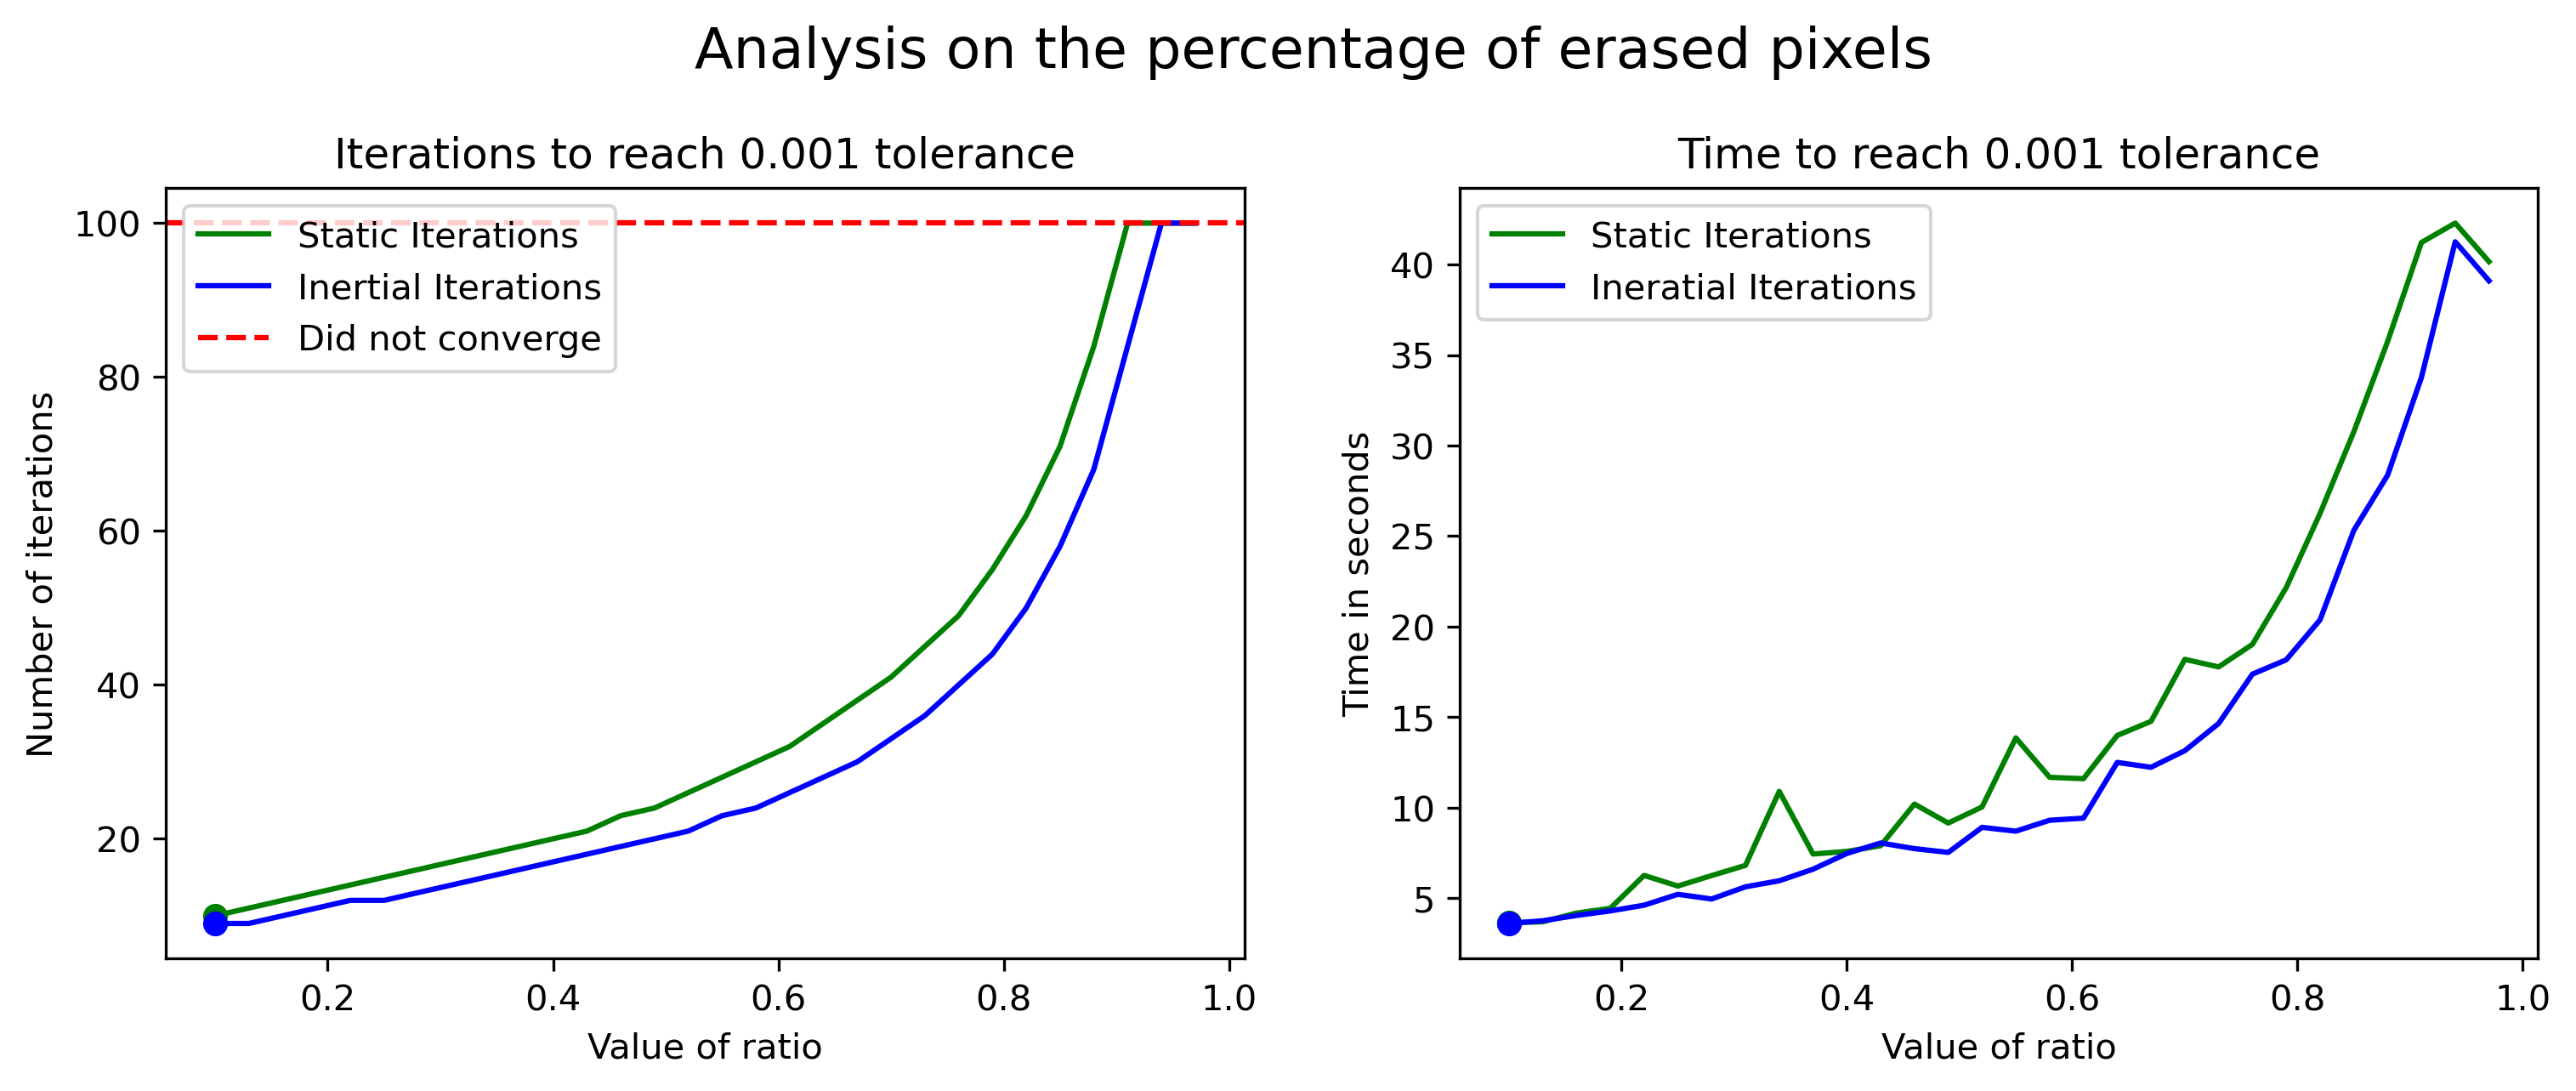

  ratio    Its Static    Time Static    Its Inertial    Time Inertial
-------  ------------  -------------  --------------  ---------------
   0.1             10        3.63736               9          3.59796
   0.13            11        3.69143               9          3.74673
   0.16            12        4.17189              10          4.03978
   0.19            13        4.43399              11          4.29147
   0.22            14        6.25281              12          4.6066
   0.25            15        5.66592              12          5.20855
   0.28            16        6.2445               13          4.94965
   0.31            17        6.80823              14          5.62398
   0.34            18       10.8965               15          5.95681
   0.37            19        7.43602              16          6.59663
   0.4             20        7.57939              17          7.46557
   0.43            21        7.89319              18          8.04466
   0.46            23

In [2]:
Exp = ExpRatio(np.arange(0.1, 0.99, 0.03), lamb = 1, rho = 1)
Exp.run(max_iterations = 100, tolerance = 1e-3, title="Analysis on the percentage of erased pixels")

## Comparison in terms of the step size
We run an experiment with a fixed relaxation parameter $\lambda=1$, whilst iterating over some representative values of the step size $\rho$, for an image with $50\%$ of its pizels randomly erased. This runs in around $6$ minutes.

Static Alpha:   0%|          | 0/20 [00:00<?, ?Value of rho/s]

Inertial Alpha:   0%|          | 0/20 [00:00<?, ?Value of rho/s]

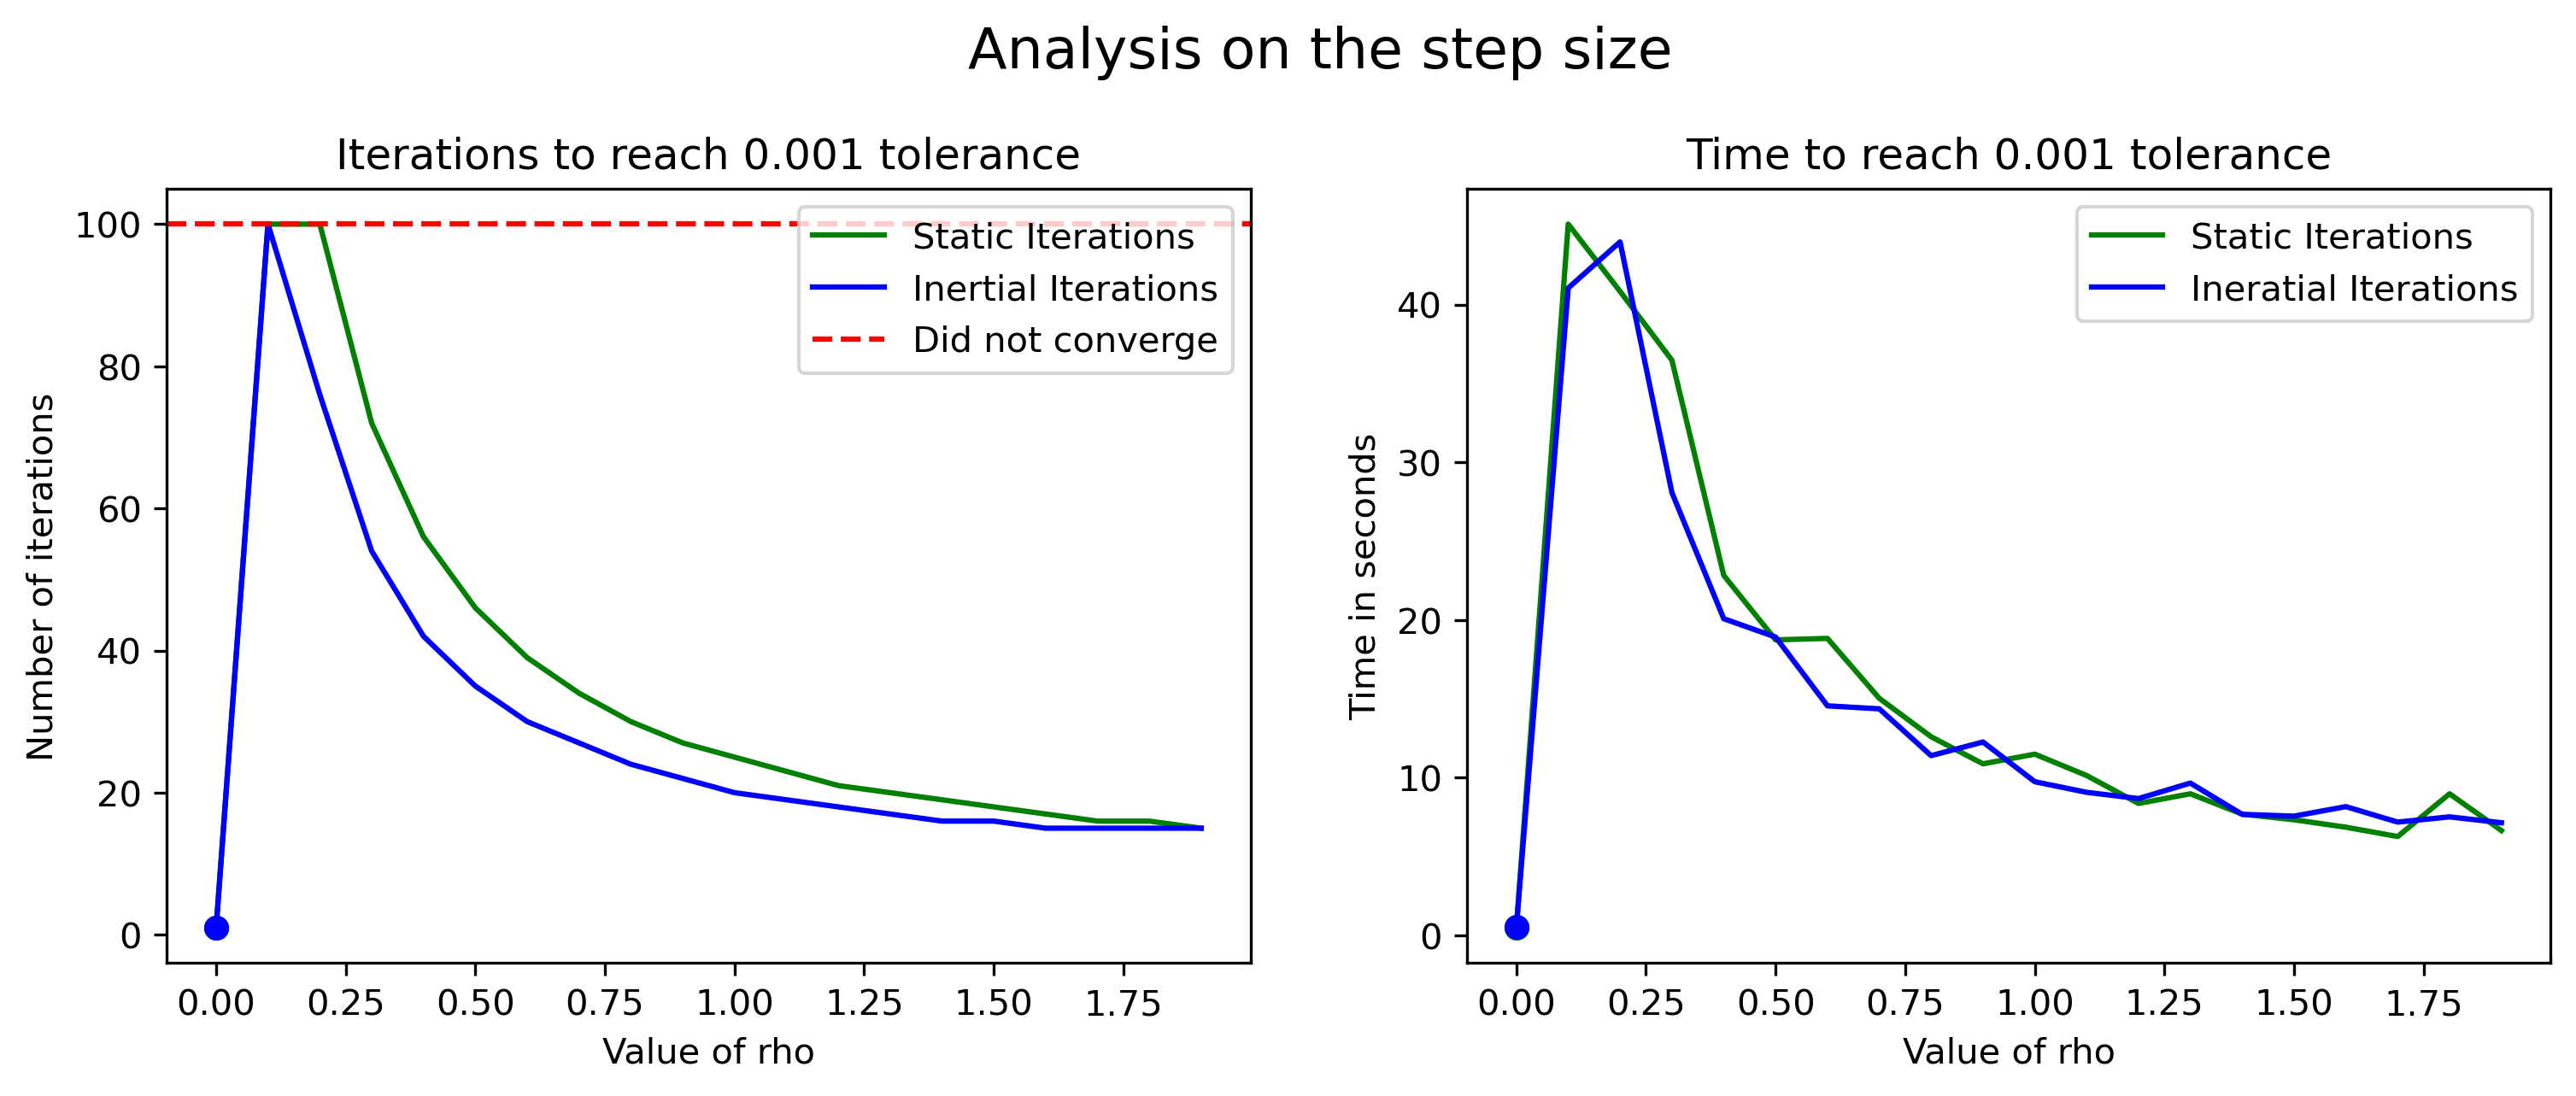

  rho    Its Static    Time Static    Its Inertial    Time Inertial
-----  ------------  -------------  --------------  ---------------
  0               1       0.481593               1         0.523732
  0.1           100      45.1065               100        41.0529
  0.2           100      40.8399                76        43.9787
  0.3            72      36.4747                54        28.0803
  0.4            56      22.8272                42        20.0804
  0.5            46      18.7375                35        18.9169
  0.6            39      18.8314                30        14.5534
  0.7            34      15.0305                27        14.3639
  0.8            30      12.5938                24        11.3945
  0.9            27      10.8755                22        12.2603
  1              25      11.4883                20         9.74096
  1.1            23      10.134                 19         9.06815
  1.2            21       8.36172               18         8.67123
 

In [3]:
Exp = ExpRho(np.arange(0.1, 2, 0.1), lamb = 1, ratio = 0.5)
Exp.run(max_iterations = 100, tolerance = 1e-3, title="Analysis on the step size")

## Comparison in terms of the relaxation parameter
We now run an experiment with a fixed  step size $\rho=1$, whilst iterating over some representative values of the relaxation parameter $\lambda$, for an image with $50\%$ of its pixels randomly erased. This takes roughly $3$ minutes to execute.

Static Alpha:   0%|          | 0/11 [00:00<?, ?Value of lambda/s]

Inertial Alpha:   0%|          | 0/11 [00:00<?, ?Value of lambda/s]

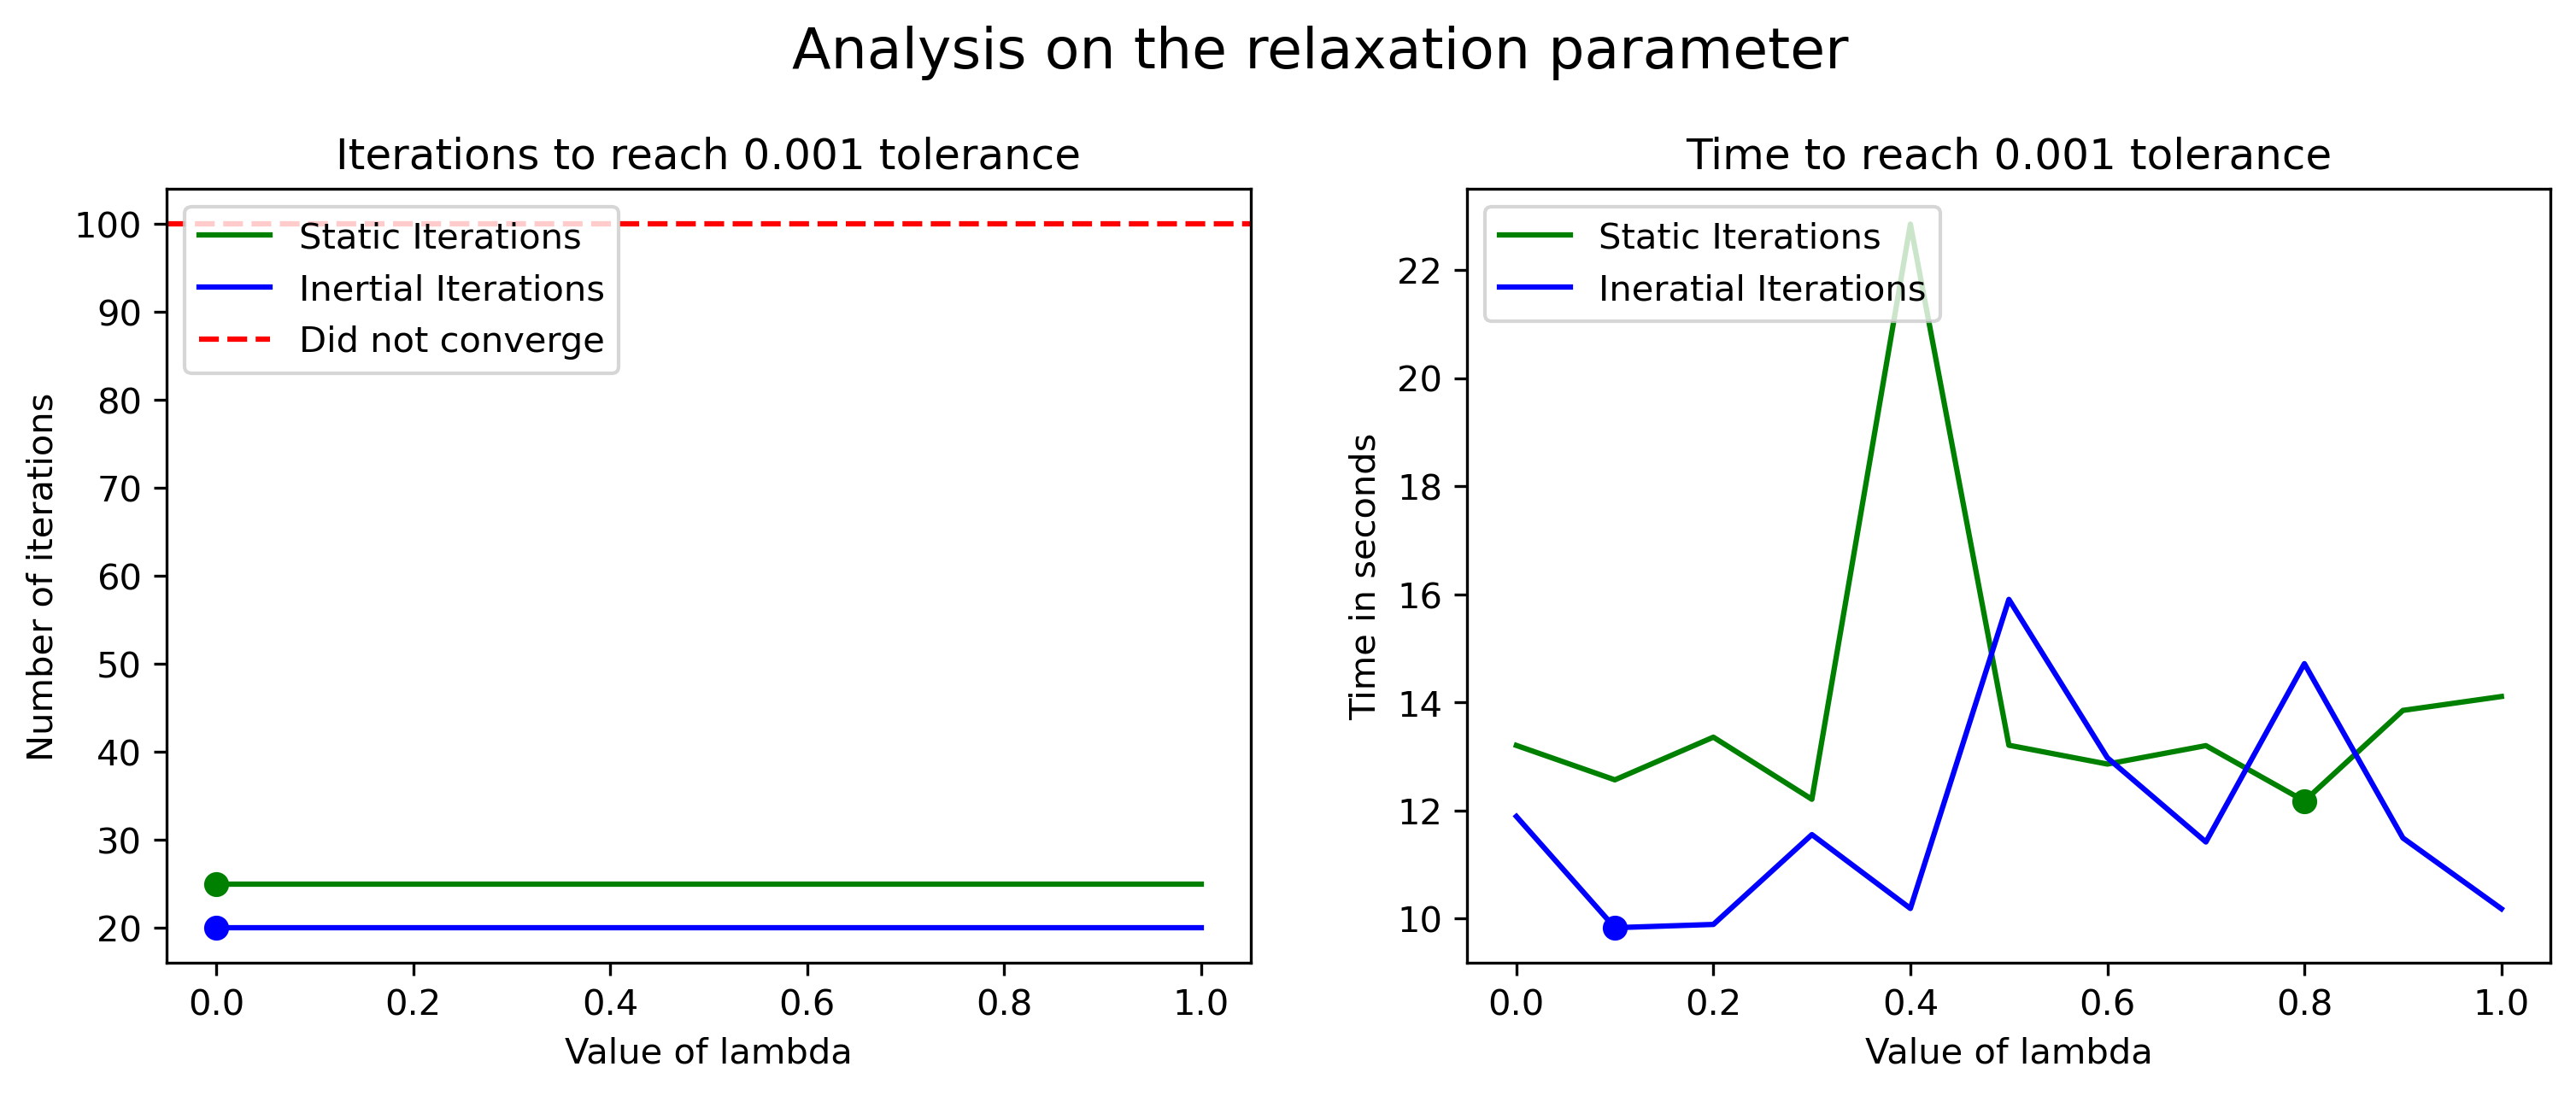

  lambda    Its Static    Time Static    Its Inertial    Time Inertial
--------  ------------  -------------  --------------  ---------------
     0              25        13.2046              20         11.8912
     0.1            25        12.5678              20          9.83278
     0.2            25        13.3571              20          9.89319
     0.3            25        12.2085              20         11.5549
     0.4            25        22.8476              20         10.1888
     0.5            25        13.2079              20         15.9055
     0.6            25        12.8597              20         12.976
     0.7            25        13.2007              20         11.4185
     0.8            25        12.176               20         14.7173
     0.9            25        13.8524              20         11.4924
     1              25        14.1093              20         10.1827


In [4]:
Exp = ExpLambda(np.arange(0.1, 1, 0.1), rho = 1, ratio = 0.5)
Exp.run(max_iterations = 100, tolerance = 1e-3, title="Analysis on the relaxation parameter")

## Final Result
In this final section we erase $50\%$ of the pixels randomly, select a step size of $\rho=1.6$ and a relaxation parameter of $\lambda=X$ (Yet to be determined), and observe this beautiful result. This runs in less than a minutes.

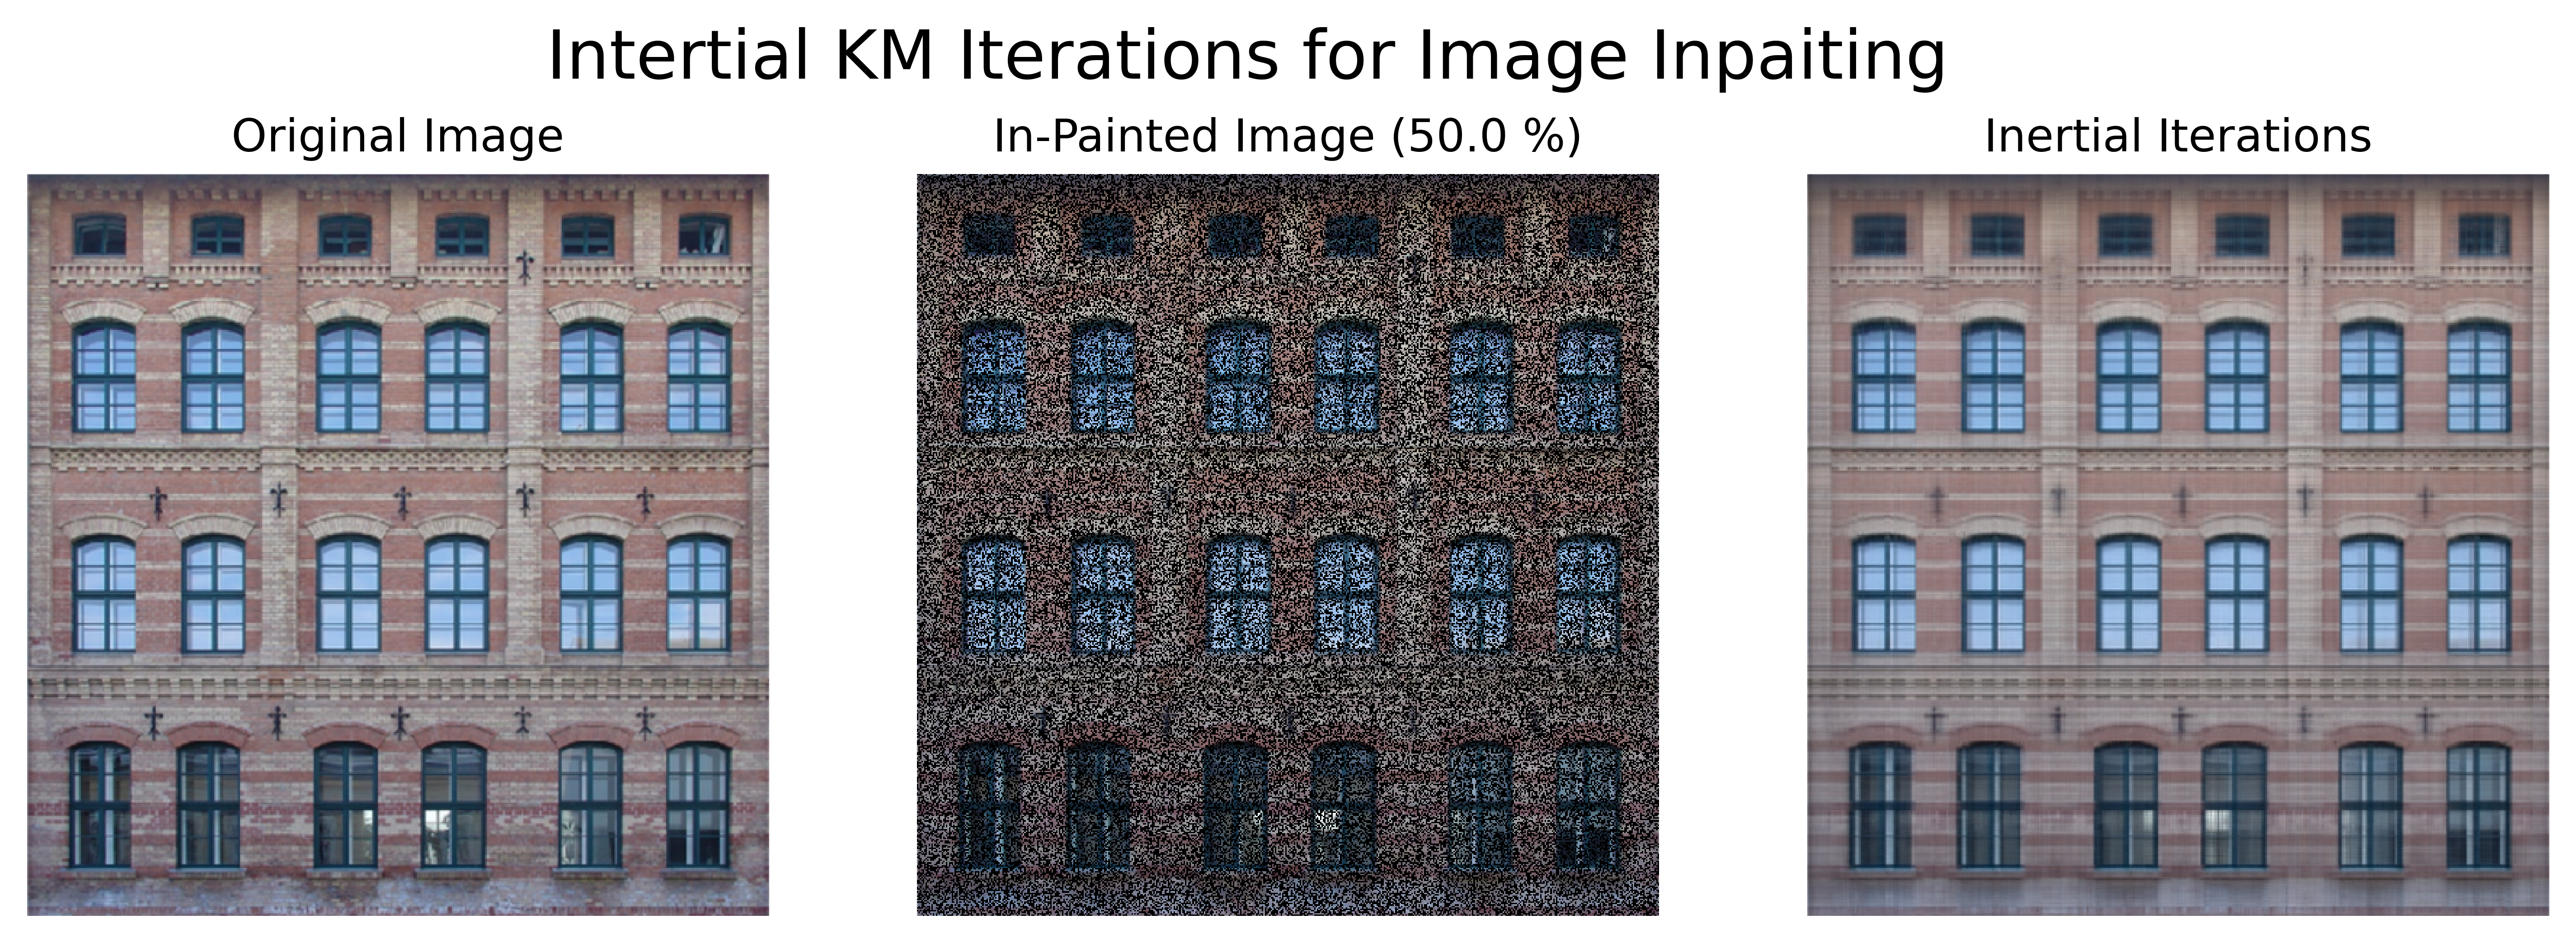

In [4]:
## Import the Image
Img = Image(image="Houses.jpeg", ratio=0.5, resize=(512, 512))

# Get Static Solution
IP_static = InPainter(Img, alpha_static = True, lamb = 0.5, rho = 1.6)
sol_static, _, conv_static = IP_static.run(max_iterations = 150, tolerance = 1e-3)

# Get Inertial Solution
IP_inertial = InPainter(Img, alpha_static = False, lamb = 0.5, rho = 1.6)
sol_inertial, _, conv_inertial = IP_inertial.run(max_iterations = 150, tolerance = 1e-3)

# Plot Both Solutions
Img.visualize([sol_inertial, "Inertial Iterations"], 
              title="Intertial KM Iterations for Image Inpaiting")

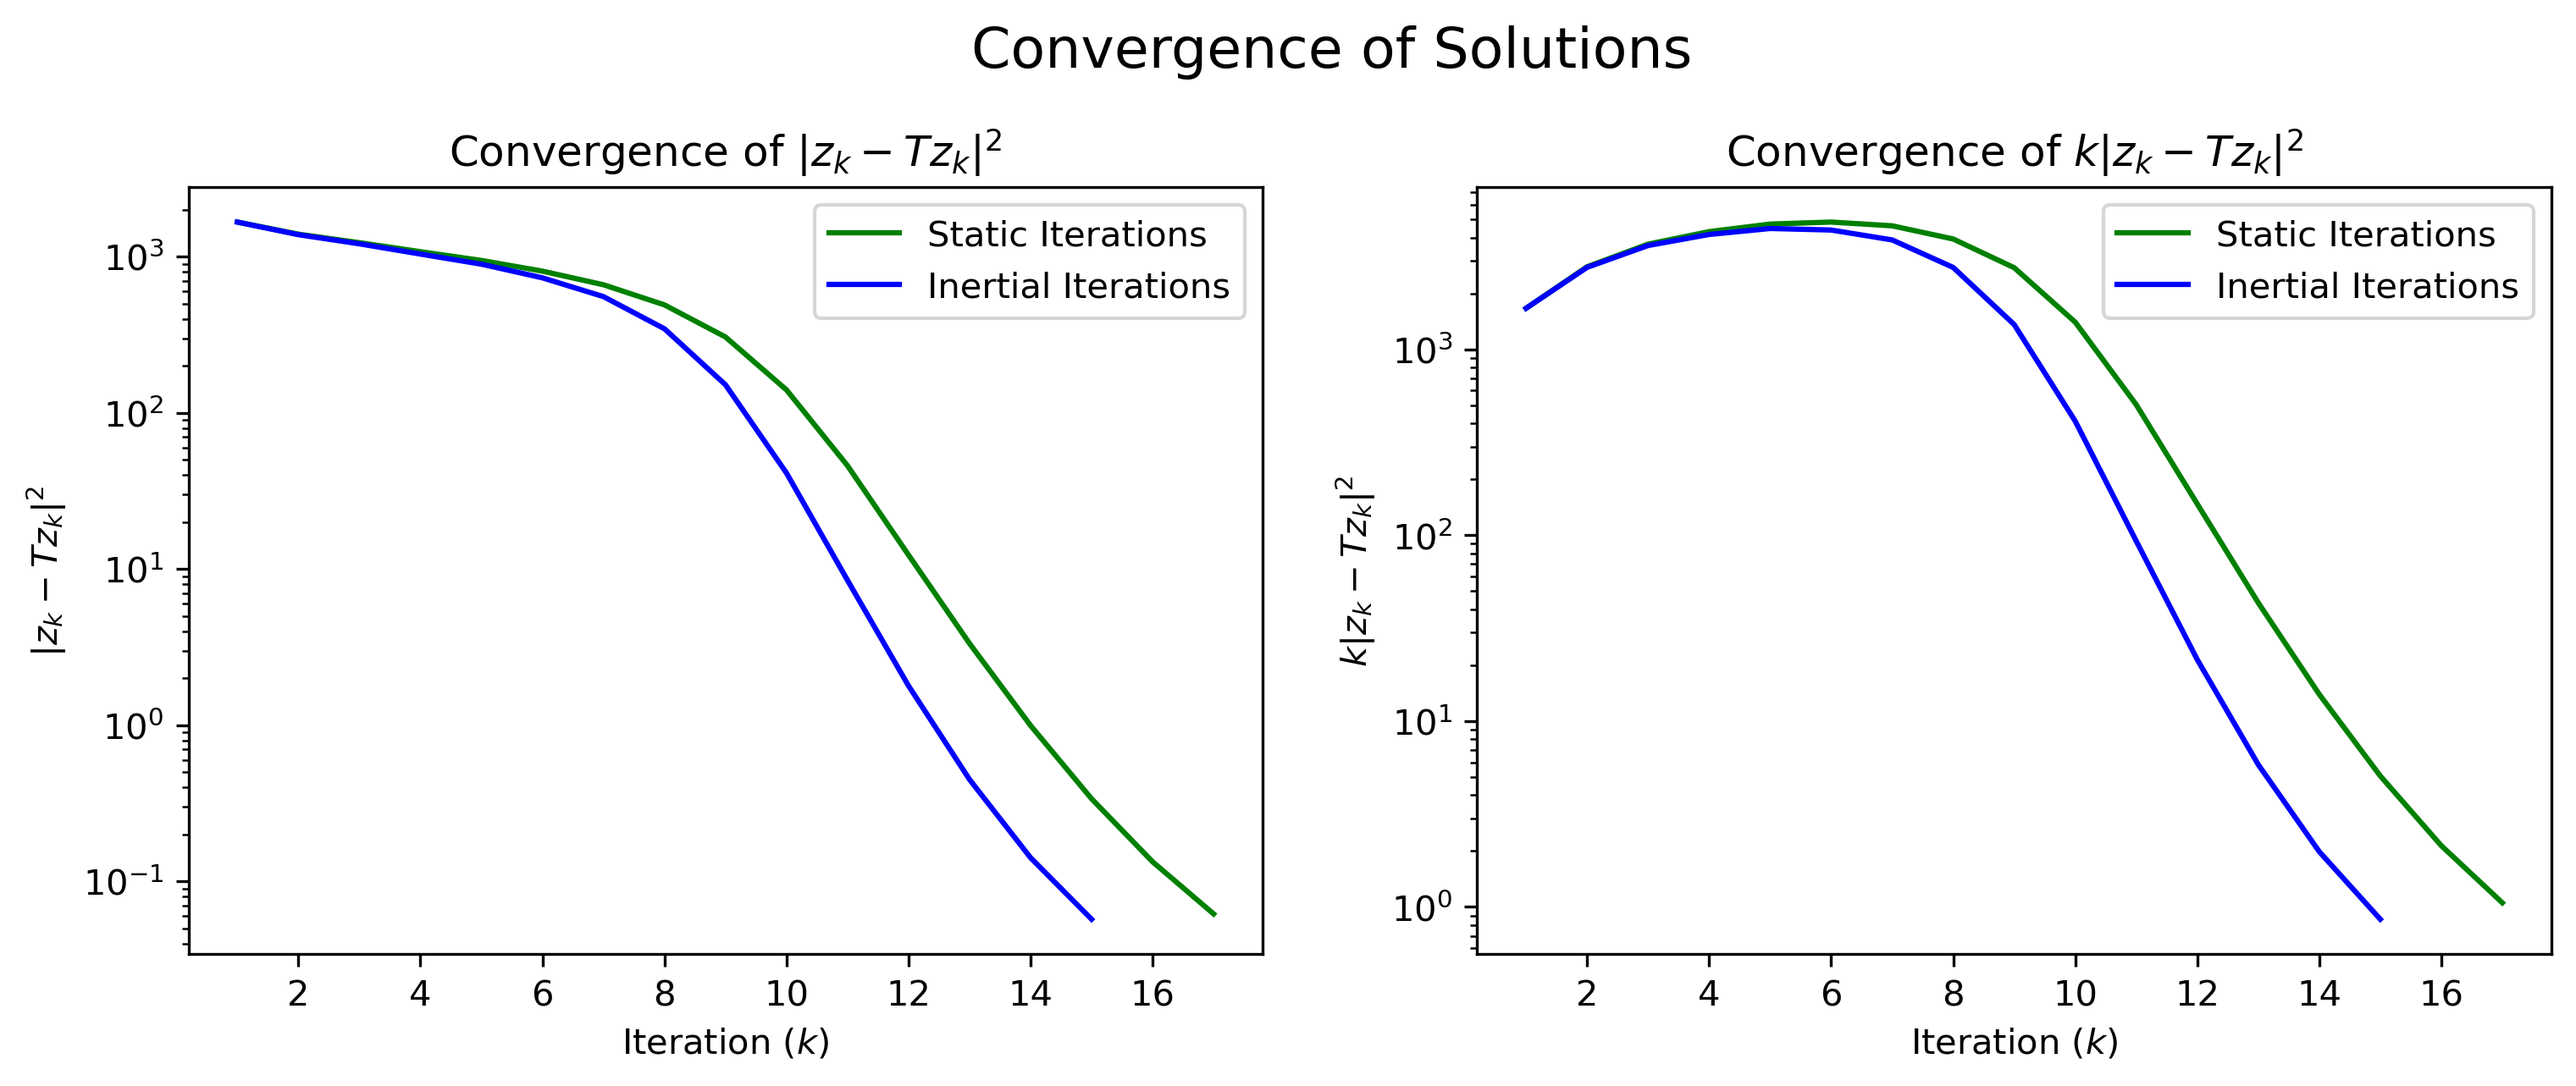

In [6]:
plot_convergence(conv_static, conv_inertial)